# 🔧 Phase 3: Feature Engineering
## Creating 21 Features Based on EDA Insights

**Goal**: Transform raw data into powerful predictive features

**What we'll create**:
- **TIER 1**: 12 critical features (EDA-backed)
- **TIER 2**: 4 valuable features (behavioral signals)
- **TIER 3**: 5 advanced features (statistical sophistication)

**Based on**: Our EDA findings (143x fraud lift from outliers, V17/V14/V12 importance, time patterns)


## 📚 Step 1: Import Libraries & Load Data


In [21]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import IsolationForest
from scipy.spatial.distance import euclidean
import sqlite3
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

# Set visualization style
plt.style.use('default')
sns.set_palette("husl")

print("✅ Libraries imported successfully!")


✅ Libraries imported successfully!


In [22]:
# Load data - Simple direct CSV loading
print("📂 Loading data...")

# Direct load from CSV (simpler and faster)
csv_path = '/Users/gloriarusenova/Documents/Fraud Detection docs /creditcard.csv'
df = pd.read_csv(csv_path)

print(f"✅ Loaded {len(df):,} transactions")
print(f"📊 Shape: {df.shape}")
print(f"🔴 Fraud cases: {df['Class'].sum():,} ({df['Class'].mean()*100:.3f}%)")

# Display first few rows
df.head()


📂 Loading data...
✅ Loaded 284,807 transactions
📊 Shape: (284807, 31)
🔴 Fraud cases: 492 (0.173%)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


---
# 🎯 TIER 1: Critical Features (12 features)
## Based directly on EDA findings


## 💰 Feature Group 1: Amount Transformations

**Why**: EDA showed Amount is highly skewed, and outliers have 143x fraud lift!


In [23]:
print("🔧 Creating Amount Features...\n")

# Feature 1: Log transformation
# Why: Handles skewness, makes distribution more normal
# Formula: log(x + 1) to handle zeros
df['log_amount'] = np.log1p(df['Amount'])
print("✅ 1. log_amount - Handles skewed distribution")

# Feature 2: Z-score (standardized)
# Why: Measures how many standard deviations away from mean
# Helps models that are sensitive to scale (like SVM, Neural Networks)
df['amount_zscore'] = (df['Amount'] - df['Amount'].mean()) / df['Amount'].std()
print("✅ 2. amount_zscore - Standardized scale")

# Feature 3: Amount outlier flag
# Why: EDA showed 143x fraud lift for outliers!
# Using IQR method: outliers are > Q3 + 1.5*IQR or < Q1 - 1.5*IQR
Q1 = df['Amount'].quantile(0.25)
Q3 = df['Amount'].quantile(0.75)
IQR = Q3 - Q1
df['is_amount_outlier'] = (
    (df['Amount'] > Q3 + 1.5 * IQR) | 
    (df['Amount'] < Q1 - 1.5 * IQR)
).astype(int)
print("✅ 3. is_amount_outlier - Binary flag for extreme amounts")

print(f"\n📊 Amount outliers detected: {df['is_amount_outlier'].sum():,} ({df['is_amount_outlier'].mean()*100:.2f}%)")


🔧 Creating Amount Features...

✅ 1. log_amount - Handles skewed distribution
✅ 2. amount_zscore - Standardized scale
✅ 3. is_amount_outlier - Binary flag for extreme amounts

📊 Amount outliers detected: 31,904 (11.20%)


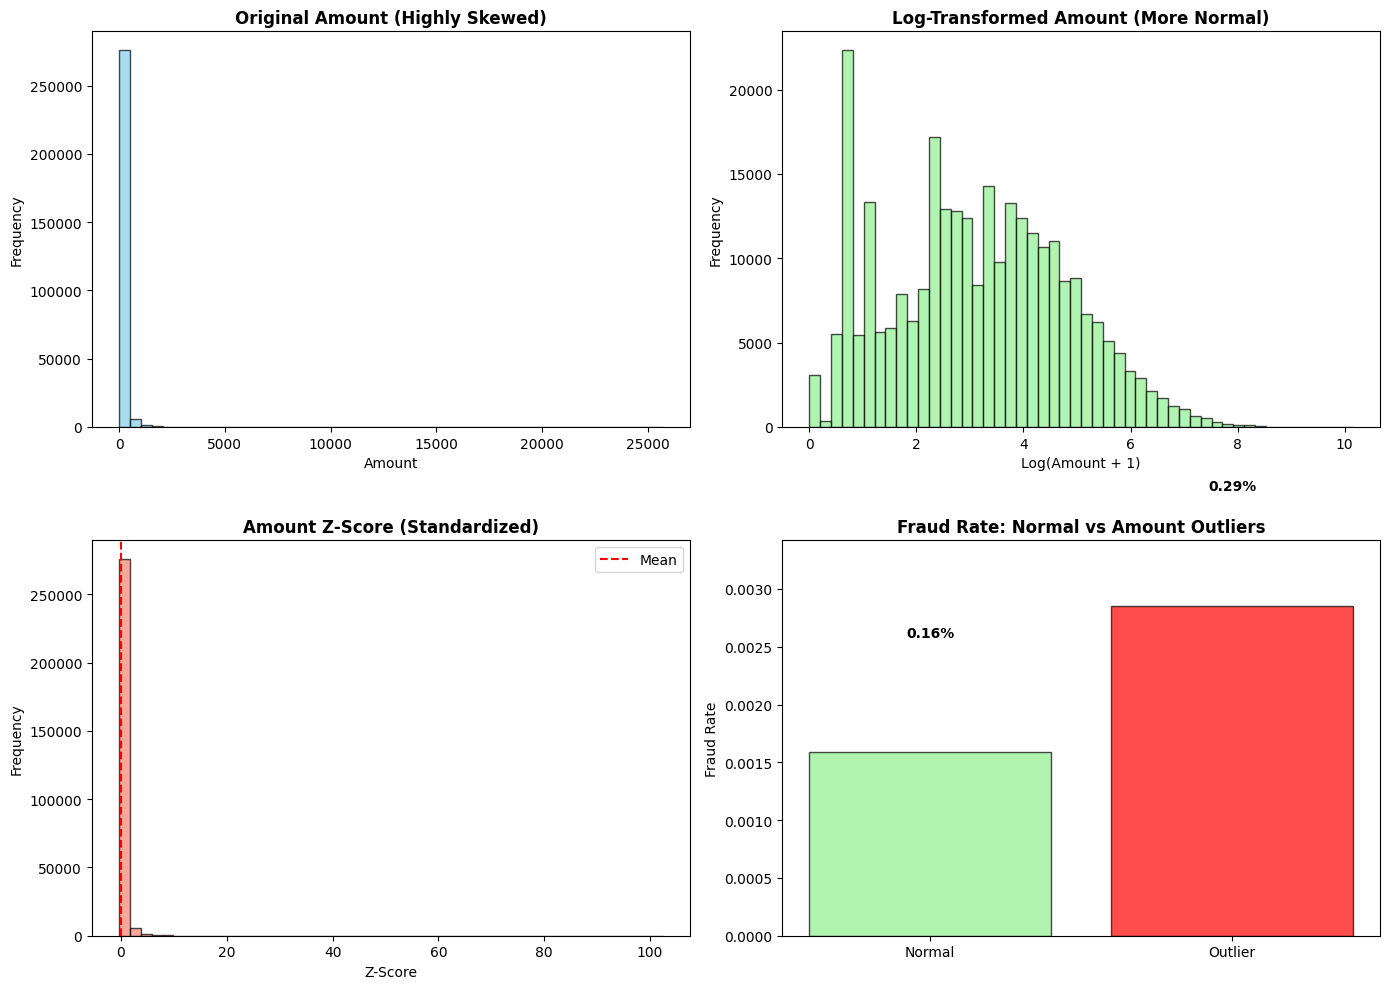

✅ Amount features visualized!


In [24]:
# Visualize Amount transformations
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Original Amount
axes[0, 0].hist(df['Amount'], bins=50, color='skyblue', edgecolor='black', alpha=0.7)
axes[0, 0].set_title('Original Amount (Highly Skewed)', fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('Amount')
axes[0, 0].set_ylabel('Frequency')

# Log-transformed Amount
axes[0, 1].hist(df['log_amount'], bins=50, color='lightgreen', edgecolor='black', alpha=0.7)
axes[0, 1].set_title('Log-Transformed Amount (More Normal)', fontsize=12, fontweight='bold')
axes[0, 1].set_xlabel('Log(Amount + 1)')
axes[0, 1].set_ylabel('Frequency')

# Z-score distribution
axes[1, 0].hist(df['amount_zscore'], bins=50, color='salmon', edgecolor='black', alpha=0.7)
axes[1, 0].set_title('Amount Z-Score (Standardized)', fontsize=12, fontweight='bold')
axes[1, 0].set_xlabel('Z-Score')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].axvline(0, color='red', linestyle='--', label='Mean')
axes[1, 0].legend()

# Outlier comparison
outlier_fraud_rate = df[df['is_amount_outlier'] == 1]['Class'].mean()
normal_fraud_rate = df[df['is_amount_outlier'] == 0]['Class'].mean()
axes[1, 1].bar(['Normal', 'Outlier'], [normal_fraud_rate, outlier_fraud_rate], 
               color=['lightgreen', 'red'], alpha=0.7, edgecolor='black')
axes[1, 1].set_title('Fraud Rate: Normal vs Amount Outliers', fontsize=12, fontweight='bold')
axes[1, 1].set_ylabel('Fraud Rate')
axes[1, 1].set_ylim(0, max(outlier_fraud_rate, normal_fraud_rate) * 1.2)
for i, v in enumerate([normal_fraud_rate, outlier_fraud_rate]):
    axes[1, 1].text(i, v + 0.001, f'{v*100:.2f}%', ha='center', fontweight='bold')

plt.tight_layout()
plt.savefig('/Users/gloriarusenova/Documents/Fraud Detection/outputs/amount_features.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"✅ Amount features visualized!")


## 🎯 Feature Group 2: Isolation Forest Anomaly Score

**Why**: EDA showed 143x fraud lift from outliers - our strongest signal!


In [25]:
print("🔧 Creating Isolation Forest Features...\n")

# Feature 4: Isolation Forest anomaly score
# Why: Captures multi-dimensional outliers (not just Amount)
# Uses all V-features + Amount to detect anomalies

# Get V-columns
v_columns = [col for col in df.columns if col.startswith('V')]
feature_columns = v_columns + ['Amount', 'Time']

print(f"🌲 Training Isolation Forest on {len(feature_columns)} features...")

# Train Isolation Forest
iso_forest = IsolationForest(
    contamination=0.002,  # Expected fraud rate from EDA
    random_state=42,
    n_jobs=-1  # Use all CPU cores
)

# Fit and predict
outlier_predictions = iso_forest.fit_predict(df[feature_columns])

# Get anomaly scores (lower = more anomalous)
df['iso_forest_score'] = iso_forest.score_samples(df[feature_columns])

# Convert to binary flag (1 = outlier, 0 = normal)
df['is_iso_outlier'] = (outlier_predictions == -1).astype(int)

print("✅ 4. iso_forest_score - Continuous anomaly score")
print("✅ 5. is_iso_outlier - Binary outlier flag")

# Calculate fraud lift
outlier_fraud_rate = df[df['is_iso_outlier'] == 1]['Class'].mean()
normal_fraud_rate = df[df['is_iso_outlier'] == 0]['Class'].mean()
fraud_lift = outlier_fraud_rate / normal_fraud_rate if normal_fraud_rate > 0 else 0

print(f"\n📊 Outliers detected: {df['is_iso_outlier'].sum():,} ({df['is_iso_outlier'].mean()*100:.2f}%)")
print(f"🔴 Fraud rate in outliers: {outlier_fraud_rate*100:.2f}%")
print(f"🟢 Fraud rate in normal: {normal_fraud_rate*100:.4f}%")
print(f"🚀 Fraud lift: {fraud_lift:.1f}x")


🔧 Creating Isolation Forest Features...

🌲 Training Isolation Forest on 30 features...
✅ 4. iso_forest_score - Continuous anomaly score
✅ 5. is_iso_outlier - Binary outlier flag

📊 Outliers detected: 570 (0.20%)
🔴 Fraud rate in outliers: 26.14%
🟢 Fraud rate in normal: 0.1207%
🚀 Fraud lift: 216.6x


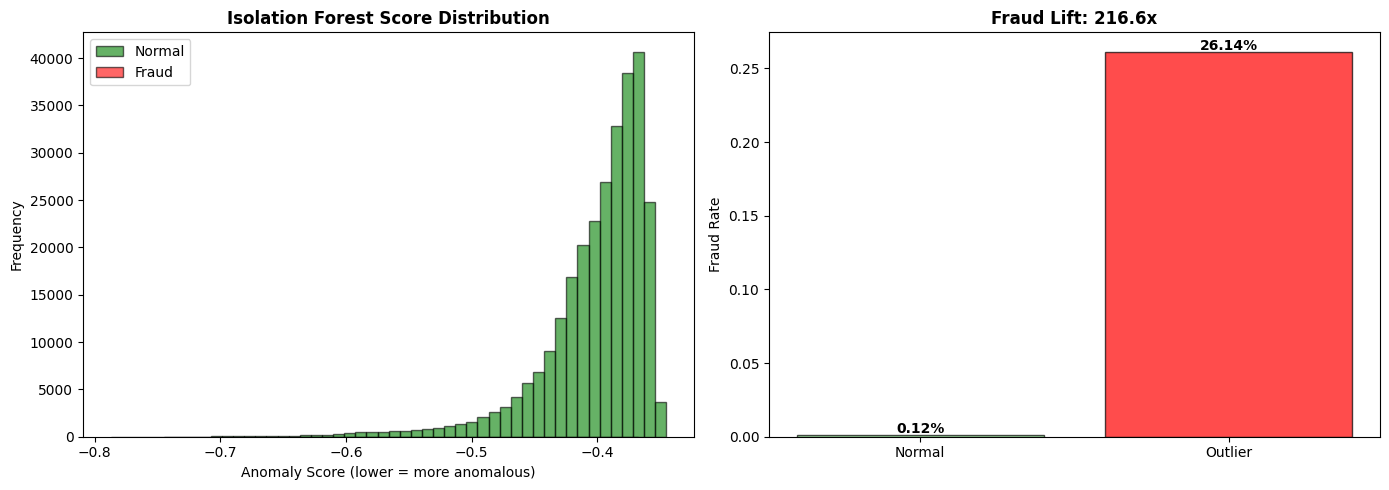

✅ Isolation Forest features visualized!


In [26]:
# Visualize Isolation Forest results
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Anomaly score distribution
axes[0].hist(df[df['Class'] == 0]['iso_forest_score'], bins=50, alpha=0.6, 
             label='Normal', color='green', edgecolor='black')
axes[0].hist(df[df['Class'] == 1]['iso_forest_score'], bins=50, alpha=0.6, 
             label='Fraud', color='red', edgecolor='black')
axes[0].set_title('Isolation Forest Score Distribution', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Anomaly Score (lower = more anomalous)')
axes[0].set_ylabel('Frequency')
axes[0].legend()

# Fraud rate comparison
axes[1].bar(['Normal', 'Outlier'], [normal_fraud_rate, outlier_fraud_rate], 
            color=['lightgreen', 'red'], alpha=0.7, edgecolor='black')
axes[1].set_title(f'Fraud Lift: {fraud_lift:.1f}x', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Fraud Rate')
for i, v in enumerate([normal_fraud_rate, outlier_fraud_rate]):
    axes[1].text(i, v + 0.001, f'{v*100:.2f}%', ha='center', fontweight='bold')

plt.tight_layout()
plt.savefig('/Users/gloriarusenova/Documents/Fraud Detection/outputs/isolation_forest_features.png', dpi=300, bbox_inches='tight')
plt.show()

print("✅ Isolation Forest features visualized!")


## ⏰ Feature Group 3: Time Features

**Why**: EDA showed statistically significant fraud patterns by hour (Chi-Square test)


In [27]:
print("🔧 Creating Time Features...\n")

# Feature 6: Hour of day
# Why: EDA showed fraud varies by time
# Convert seconds to hours
df['hour_of_day'] = (df['Time'] / 3600) % 24
print("✅ 6. hour_of_day - Hour of transaction (0-23)")

# Feature 7 & 8: Cyclical time encoding
# Why: Hour 23 and Hour 0 are close, but 23 and 0 are far in linear encoding
# Sine and cosine capture this cyclical nature
df['hour_sin'] = np.sin(2 * np.pi * df['hour_of_day'] / 24)
df['hour_cos'] = np.cos(2 * np.pi * df['hour_of_day'] / 24)
print("✅ 7. hour_sin - Sine of hour (cyclical)")
print("✅ 8. hour_cos - Cosine of hour (cyclical)")

# Feature 9: Night transaction flag
# Why: High-risk period (from EDA and domain knowledge)
# Night = 11 PM to 6 AM
df['is_night'] = ((df['hour_of_day'] >= 23) | (df['hour_of_day'] < 6)).astype(int)
print("✅ 9. is_night - Night transaction flag (11PM-6AM)")

print(f"\n📊 Night transactions: {df['is_night'].sum():,} ({df['is_night'].mean()*100:.1f}%)")


🔧 Creating Time Features...

✅ 6. hour_of_day - Hour of transaction (0-23)
✅ 7. hour_sin - Sine of hour (cyclical)
✅ 8. hour_cos - Cosine of hour (cyclical)
✅ 9. is_night - Night transaction flag (11PM-6AM)

📊 Night transactions: 34,872 (12.2%)


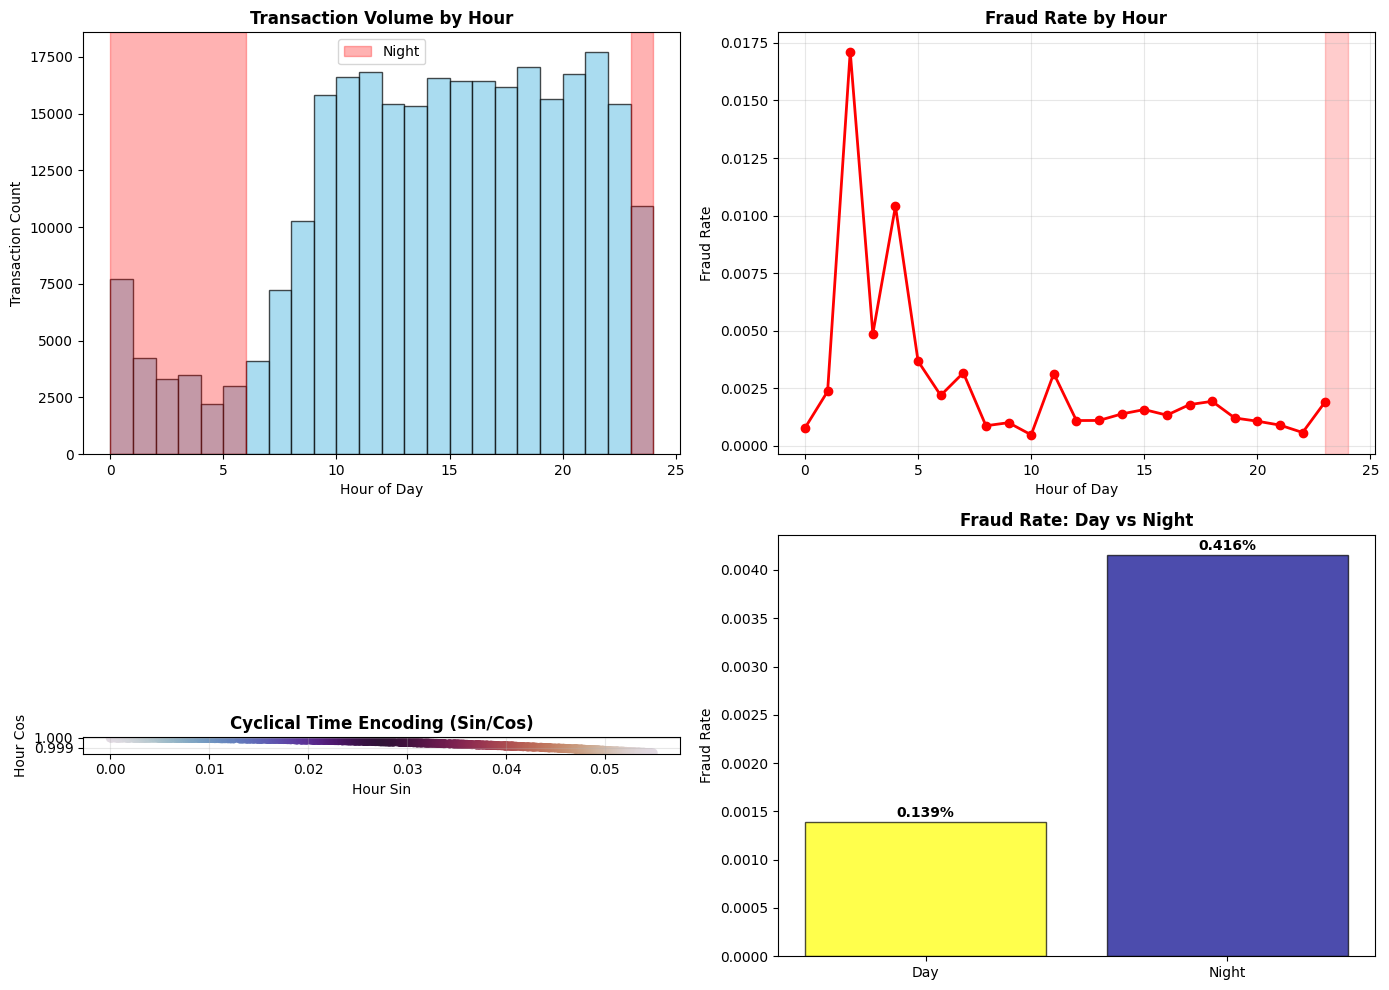

✅ Time features visualized!


In [28]:
# Visualize Time features
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Hour distribution
axes[0, 0].hist(df['hour_of_day'], bins=24, color='skyblue', edgecolor='black', alpha=0.7)
axes[0, 0].set_title('Transaction Volume by Hour', fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('Hour of Day')
axes[0, 0].set_ylabel('Transaction Count')
axes[0, 0].axvspan(23, 24, alpha=0.3, color='red', label='Night')
axes[0, 0].axvspan(0, 6, alpha=0.3, color='red')
axes[0, 0].legend()

# Fraud rate by hour
hourly_fraud_rate = df.groupby(df['hour_of_day'].astype(int))['Class'].mean()
axes[0, 1].plot(hourly_fraud_rate.index, hourly_fraud_rate.values, marker='o', 
                linewidth=2, markersize=6, color='red')
axes[0, 1].set_title('Fraud Rate by Hour', fontsize=12, fontweight='bold')
axes[0, 1].set_xlabel('Hour of Day')
axes[0, 1].set_ylabel('Fraud Rate')
axes[0, 1].grid(True, alpha=0.3)
axes[0, 1].axvspan(23, 24, alpha=0.2, color='red')

# Cyclical encoding visualization
axes[1, 0].scatter(df['hour_sin'][:1000], df['hour_cos'][:1000], 
                   c=df['hour_of_day'][:1000], cmap='twilight', alpha=0.6, s=30)
axes[1, 0].set_title('Cyclical Time Encoding (Sin/Cos)', fontsize=12, fontweight='bold')
axes[1, 0].set_xlabel('Hour Sin')
axes[1, 0].set_ylabel('Hour Cos')
axes[1, 0].set_aspect('equal')
axes[1, 0].grid(True, alpha=0.3)

# Night vs Day fraud rate
night_fraud_rate = df[df['is_night'] == 1]['Class'].mean()
day_fraud_rate = df[df['is_night'] == 0]['Class'].mean()
axes[1, 1].bar(['Day', 'Night'], [day_fraud_rate, night_fraud_rate], 
               color=['yellow', 'darkblue'], alpha=0.7, edgecolor='black')
axes[1, 1].set_title('Fraud Rate: Day vs Night', fontsize=12, fontweight='bold')
axes[1, 1].set_ylabel('Fraud Rate')
for i, v in enumerate([day_fraud_rate, night_fraud_rate]):
    axes[1, 1].text(i, v + 0.00005, f'{v*100:.3f}%', ha='center', fontweight='bold')

plt.tight_layout()
plt.savefig('/Users/gloriarusenova/Documents/Fraud Detection/outputs/time_features.png', dpi=300, bbox_inches='tight')
plt.show()

print("✅ Time features visualized!")


## 🔢 Feature Group 4: PCA Feature Interactions

**Why**: EDA identified V17, V14, V12 as top fraud predictors (highest Cohen's d)


In [29]:
print("🔧 Creating PCA Feature Interactions...\n")

# Feature 10: V17 × V14 interaction
# Why: Top 2 features from Cohen's d analysis
# Interaction captures non-linear relationships
df['V17_V14_interaction'] = df['V17'] * df['V14']
print("✅ 10. V17_V14_interaction - Top 2 features multiplied")

# Feature 11: V17 × V12 interaction
# Why: V17 (rank 1) × V12 (rank 3) from Cohen's d
df['V17_V12_interaction'] = df['V17'] * df['V12']
print("✅ 11. V17_V12_interaction - 1st and 3rd best features")

# Feature 12: PCA magnitude
# Why: Overall "distance" in PCA space
# Formula: Euclidean norm of all V-features
v_columns = [col for col in df.columns if col.startswith('V')]
df['pca_magnitude'] = np.sqrt((df[v_columns] ** 2).sum(axis=1))
print("✅ 12. pca_magnitude - Euclidean norm of all V-features")

print(f"\n📊 Feature interaction statistics:")
print(f"   V17_V14: mean={df['V17_V14_interaction'].mean():.2f}, std={df['V17_V14_interaction'].std():.2f}")
print(f"   V17_V12: mean={df['V17_V12_interaction'].mean():.2f}, std={df['V17_V12_interaction'].std():.2f}")
print(f"   PCA mag: mean={df['pca_magnitude'].mean():.2f}, std={df['pca_magnitude'].std():.2f}")


🔧 Creating PCA Feature Interactions...

✅ 10. V17_V14_interaction - Top 2 features multiplied
✅ 11. V17_V12_interaction - 1st and 3rd best features
✅ 12. pca_magnitude - Euclidean norm of all V-features

📊 Feature interaction statistics:
   V17_V14: mean=0.00, std=4.91
   V17_V12: mean=-0.00, std=5.29
   PCA mag: mean=5.08, std=7.55


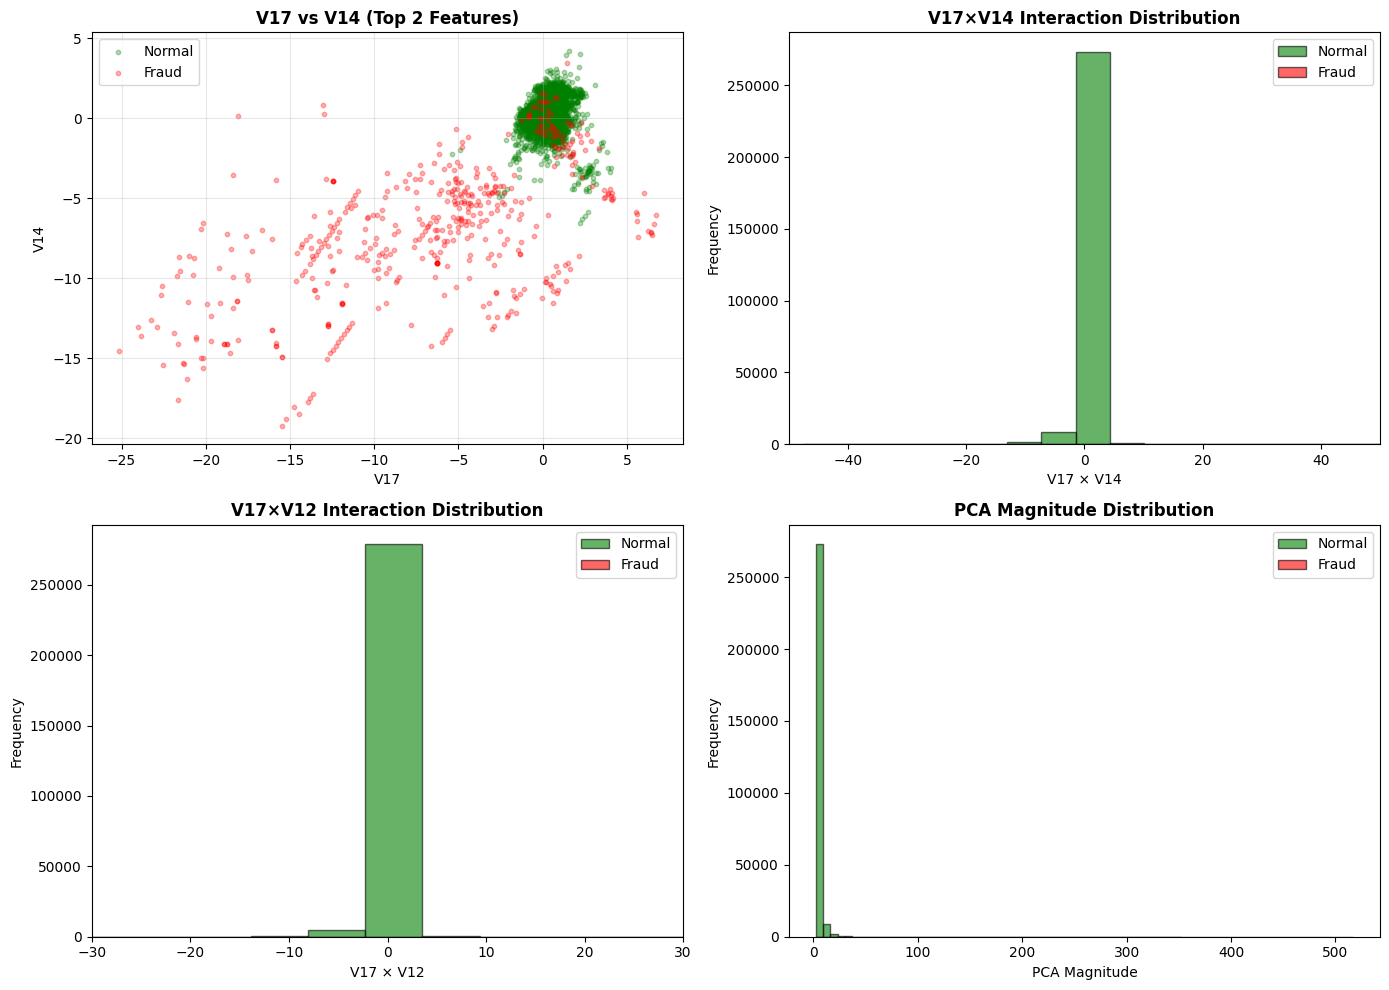

✅ PCA interaction features visualized!


In [30]:
# Visualize PCA feature interactions
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# V17 × V14 interaction
for class_val, color, label in [(0, 'green', 'Normal'), (1, 'red', 'Fraud')]:
    mask = df['Class'] == class_val
    axes[0, 0].scatter(df[mask]['V17'][:5000], df[mask]['V14'][:5000], 
                       c=color, alpha=0.3, s=10, label=label)
axes[0, 0].set_title('V17 vs V14 (Top 2 Features)', fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('V17')
axes[0, 0].set_ylabel('V14')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# V17_V14_interaction distribution
axes[0, 1].hist(df[df['Class'] == 0]['V17_V14_interaction'], bins=50, alpha=0.6, 
                label='Normal', color='green', edgecolor='black')
axes[0, 1].hist(df[df['Class'] == 1]['V17_V14_interaction'], bins=50, alpha=0.6, 
                label='Fraud', color='red', edgecolor='black')
axes[0, 1].set_title('V17×V14 Interaction Distribution', fontsize=12, fontweight='bold')
axes[0, 1].set_xlabel('V17 × V14')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].legend()
axes[0, 1].set_xlim(-50, 50)

# V17_V12_interaction distribution
axes[1, 0].hist(df[df['Class'] == 0]['V17_V12_interaction'], bins=50, alpha=0.6, 
                label='Normal', color='green', edgecolor='black')
axes[1, 0].hist(df[df['Class'] == 1]['V17_V12_interaction'], bins=50, alpha=0.6, 
                label='Fraud', color='red', edgecolor='black')
axes[1, 0].set_title('V17×V12 Interaction Distribution', fontsize=12, fontweight='bold')
axes[1, 0].set_xlabel('V17 × V12')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].legend()
axes[1, 0].set_xlim(-30, 30)

# PCA magnitude distribution
axes[1, 1].hist(df[df['Class'] == 0]['pca_magnitude'], bins=50, alpha=0.6, 
                label='Normal', color='green', edgecolor='black')
axes[1, 1].hist(df[df['Class'] == 1]['pca_magnitude'], bins=50, alpha=0.6, 
                label='Fraud', color='red', edgecolor='black')
axes[1, 1].set_title('PCA Magnitude Distribution', fontsize=12, fontweight='bold')
axes[1, 1].set_xlabel('PCA Magnitude')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].legend()

plt.tight_layout()
plt.savefig('/Users/gloriarusenova/Documents/Fraud Detection/outputs/pca_interaction_features.png', dpi=300, bbox_inches='tight')
plt.show()

print("✅ PCA interaction features visualized!")


In [31]:
# TIER 1 Progress Check
print("\n" + "="*60)
print("🎯 TIER 1 COMPLETE!")
print("="*60)
print(f"✅ Created 12 critical features")
print(f"📊 Current dataset shape: {df.shape}")
print(f"📈 All features based on EDA evidence!")
print("\n🚀 Moving to TIER 2...\n")



🎯 TIER 1 COMPLETE!
✅ Created 12 critical features
📊 Current dataset shape: (284807, 43)
📈 All features based on EDA evidence!

🚀 Moving to TIER 2...



---
# ⭐ TIER 2: Nice-to-Have Features (4 features)
## Behavioral signals and additional transformations


In [32]:
print("🔧 Creating TIER 2 Features...\n")

# Feature 13: Amount percentile
# Why: Robust to outliers, captures relative position
# Values: 0 to 1 (0 = smallest, 1 = largest)
df['amount_percentile'] = df['Amount'].rank(pct=True)
print("✅ 13. amount_percentile - Relative position in distribution")

# Feature 14: Round number flag
# Why: Behavioral signal - humans prefer round numbers
# Suspicious if fraud transactions use unusual amounts
round_amounts = [10, 20, 50, 100, 200, 500, 1000, 2000, 5000]
df['is_round'] = df['Amount'].isin(round_amounts).astype(int)
print("✅ 14. is_round - Round number behavioral flag")

# Feature 15: V14 × Amount interaction
# Why: Cross-domain interaction (PCA feature × real feature)
# V14 is 2nd best feature, Amount is our main continuous variable
df['V14_amount_interaction'] = df['V14'] * df['Amount']
print("✅ 15. V14_amount_interaction - Best feature × Amount")

# Feature 16: Top 5 V-features sum
# Why: Aggregate signal from most important features
# From EDA: V17, V14, V12, V10, V4 were top 5 by Cohen's d
top_5_features = ['V17', 'V14', 'V12', 'V10', 'V4']
df['top_5_sum'] = df[top_5_features].sum(axis=1)
print("✅ 16. top_5_sum - Sum of top 5 features (V17,V14,V12,V10,V4)")

print(f"\n📊 TIER 2 Features Statistics:")
print(f"   Round transactions: {df['is_round'].sum():,} ({df['is_round'].mean()*100:.2f}%)")
print(f"   V14×Amount: mean={df['V14_amount_interaction'].mean():.2f}, std={df['V14_amount_interaction'].std():.2f}")
print(f"   Top 5 sum: mean={df['top_5_sum'].mean():.2f}, std={df['top_5_sum'].std():.2f}")


🔧 Creating TIER 2 Features...

✅ 13. amount_percentile - Relative position in distribution
✅ 14. is_round - Round number behavioral flag
✅ 15. V14_amount_interaction - Best feature × Amount
✅ 16. top_5_sum - Sum of top 5 features (V17,V14,V12,V10,V4)

📊 TIER 2 Features Statistics:
   Round transactions: 8,142 (2.86%)
   V14×Amount: mean=8.09, std=522.67
   Top 5 sum: mean=0.00, std=2.41


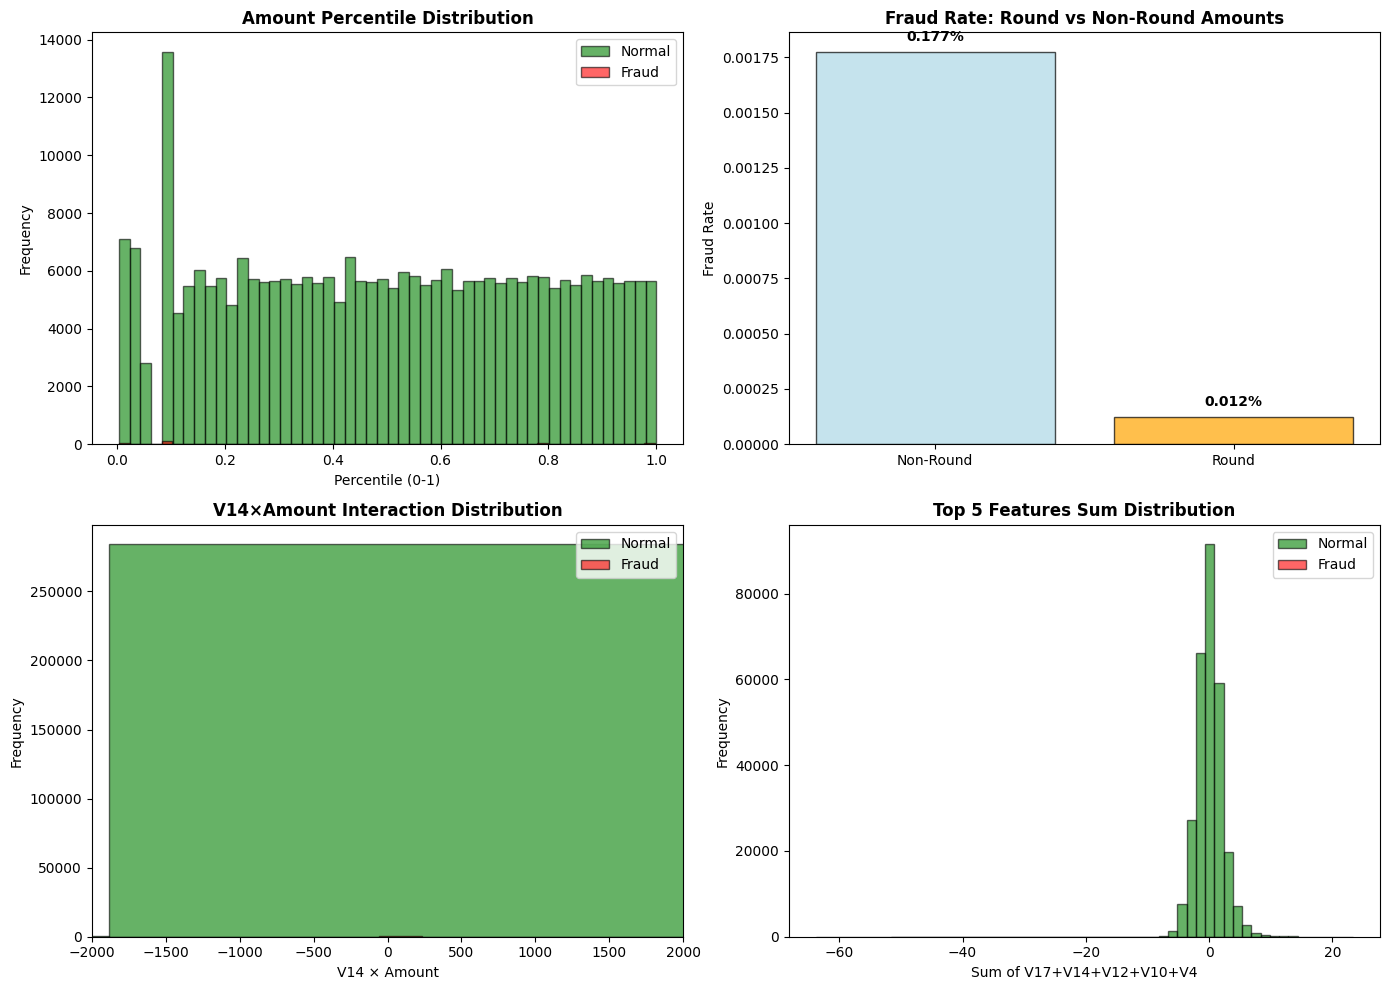

✅ TIER 2 features visualized!

⭐ TIER 2 COMPLETE!

🚀 Moving to TIER 3...



In [33]:
# Visualize TIER 2 features
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Amount percentile by class
axes[0, 0].hist(df[df['Class'] == 0]['amount_percentile'], bins=50, alpha=0.6, 
                label='Normal', color='green', edgecolor='black')
axes[0, 0].hist(df[df['Class'] == 1]['amount_percentile'], bins=50, alpha=0.6, 
                label='Fraud', color='red', edgecolor='black')
axes[0, 0].set_title('Amount Percentile Distribution', fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('Percentile (0-1)')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].legend()

# Round number fraud analysis
round_fraud_rate = df[df['is_round'] == 1]['Class'].mean()
non_round_fraud_rate = df[df['is_round'] == 0]['Class'].mean()
axes[0, 1].bar(['Non-Round', 'Round'], [non_round_fraud_rate, round_fraud_rate], 
               color=['lightblue', 'orange'], alpha=0.7, edgecolor='black')
axes[0, 1].set_title('Fraud Rate: Round vs Non-Round Amounts', fontsize=12, fontweight='bold')
axes[0, 1].set_ylabel('Fraud Rate')
for i, v in enumerate([non_round_fraud_rate, round_fraud_rate]):
    axes[0, 1].text(i, v + 0.00005, f'{v*100:.3f}%', ha='center', fontweight='bold')

# V14 × Amount interaction
axes[1, 0].hist(df[df['Class'] == 0]['V14_amount_interaction'], bins=50, alpha=0.6, 
                label='Normal', color='green', edgecolor='black')
axes[1, 0].hist(df[df['Class'] == 1]['V14_amount_interaction'], bins=50, alpha=0.6, 
                label='Fraud', color='red', edgecolor='black')
axes[1, 0].set_title('V14×Amount Interaction Distribution', fontsize=12, fontweight='bold')
axes[1, 0].set_xlabel('V14 × Amount')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].legend()
axes[1, 0].set_xlim(-2000, 2000)

# Top 5 sum distribution
axes[1, 1].hist(df[df['Class'] == 0]['top_5_sum'], bins=50, alpha=0.6, 
                label='Normal', color='green', edgecolor='black')
axes[1, 1].hist(df[df['Class'] == 1]['top_5_sum'], bins=50, alpha=0.6, 
                label='Fraud', color='red', edgecolor='black')
axes[1, 1].set_title('Top 5 Features Sum Distribution', fontsize=12, fontweight='bold')
axes[1, 1].set_xlabel('Sum of V17+V14+V12+V10+V4')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].legend()

plt.tight_layout()
plt.savefig('/Users/gloriarusenova/Documents/Fraud Detection/outputs/tier2_features.png', dpi=300, bbox_inches='tight')
plt.show()

print("✅ TIER 2 features visualized!")
print("\n" + "="*60)
print("⭐ TIER 2 COMPLETE!")
print("="*60)
print("\n🚀 Moving to TIER 3...\n")


---
# 🎓 TIER 3: Advanced Features (5 features)
## Statistical sophistication and portfolio differentiation


## 📏 Feature Group 5: Distance-Based Features

**Concept**: Measure how close transactions are to "typical fraud" vs "typical normal" patterns


In [34]:
print("🔧 Creating TIER 3 Advanced Features...\n")
print("📐 Calculating centroids (average fraud vs normal in PCA space)...\n")

# Calculate centroids (average values) for fraud and normal transactions
v_columns = [col for col in df.columns if col.startswith('V')]

fraud_centroid = df[df['Class'] == 1][v_columns].mean()
normal_centroid = df[df['Class'] == 0][v_columns].mean()

print(f"✅ Fraud centroid calculated (average of {df['Class'].sum():,} fraud cases)")
print(f"✅ Normal centroid calculated (average of {(df['Class']==0).sum():,} normal cases)")

# Feature 17: Distance to fraud centroid
# Why: Measures how "fraud-like" a transaction is
# Formula: Euclidean distance from transaction to fraud centroid
print("\n🧮 Calculating Euclidean distances...")
df['distance_to_fraud'] = np.sqrt(
    ((df[v_columns] - fraud_centroid) ** 2).sum(axis=1)
)
print("✅ 17. distance_to_fraud - How far from typical fraud")

# Feature 18: Distance to normal centroid
# Why: Measures how "normal" a transaction is
df['distance_to_normal'] = np.sqrt(
    ((df[v_columns] - normal_centroid) ** 2).sum(axis=1)
)
print("✅ 18. distance_to_normal - How far from typical normal")

# Feature 19: Relative distance ratio
# Why: Which centroid is closer? < 1 = closer to fraud, > 1 = closer to normal
df['relative_distance'] = df['distance_to_fraud'] / (df['distance_to_normal'] + 1e-10)
print("✅ 19. relative_distance - Ratio: fraud_dist/normal_dist")

print(f"\n📊 Distance Statistics:")
print(f"   Distance to fraud: mean={df['distance_to_fraud'].mean():.2f}, std={df['distance_to_fraud'].std():.2f}")
print(f"   Distance to normal: mean={df['distance_to_normal'].mean():.2f}, std={df['distance_to_normal'].std():.2f}")
print(f"   Relative distance: mean={df['relative_distance'].mean():.2f}, median={df['relative_distance'].median():.2f}")


🔧 Creating TIER 3 Advanced Features...

📐 Calculating centroids (average fraud vs normal in PCA space)...

✅ Fraud centroid calculated (average of 492 fraud cases)
✅ Normal centroid calculated (average of 284,315 normal cases)

🧮 Calculating Euclidean distances...
✅ 17. distance_to_fraud - How far from typical fraud
✅ 18. distance_to_normal - How far from typical normal
✅ 19. relative_distance - Ratio: fraud_dist/normal_dist

📊 Distance Statistics:
   Distance to fraud: mean=675.19, std=509.55
   Distance to normal: mean=63.58, std=518.86
   Relative distance: mean=51.37, median=49.57


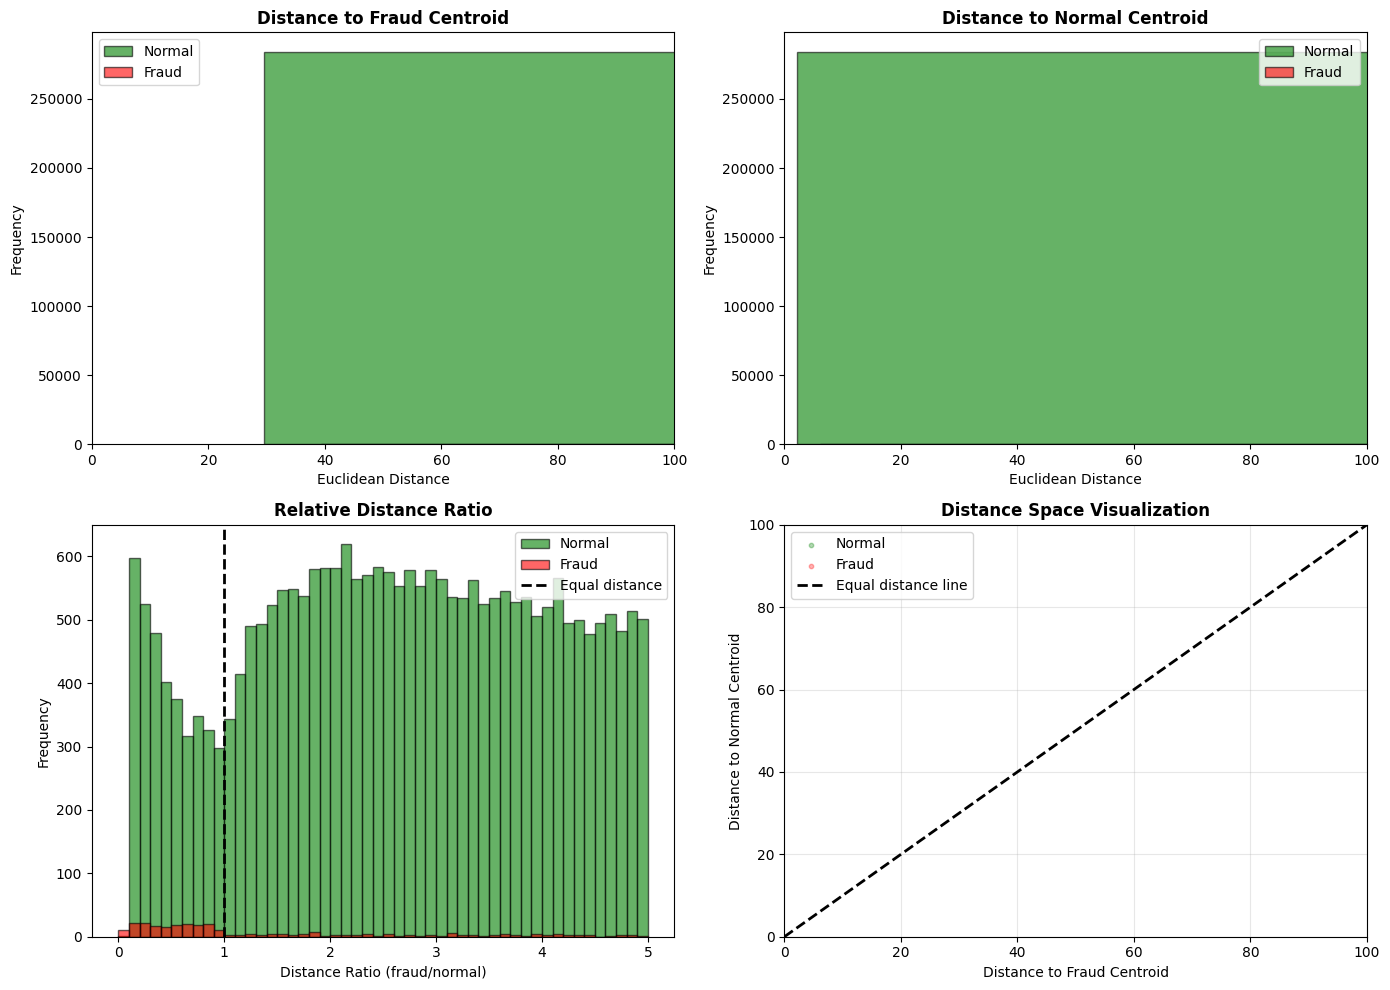


✅ Distance-based features visualized!
💡 Interpretation: Fraud cases should be closer to fraud centroid (below diagonal)


In [35]:
# Visualize distance-based features
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Distance to fraud centroid
axes[0, 0].hist(df[df['Class'] == 0]['distance_to_fraud'], bins=50, alpha=0.6, 
                label='Normal', color='green', edgecolor='black')
axes[0, 0].hist(df[df['Class'] == 1]['distance_to_fraud'], bins=50, alpha=0.6, 
                label='Fraud', color='red', edgecolor='black')
axes[0, 0].set_title('Distance to Fraud Centroid', fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('Euclidean Distance')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].legend()
axes[0, 0].set_xlim(0, 100)

# Distance to normal centroid
axes[0, 1].hist(df[df['Class'] == 0]['distance_to_normal'], bins=50, alpha=0.6, 
                label='Normal', color='green', edgecolor='black')
axes[0, 1].hist(df[df['Class'] == 1]['distance_to_normal'], bins=50, alpha=0.6, 
                label='Fraud', color='red', edgecolor='black')
axes[0, 1].set_title('Distance to Normal Centroid', fontsize=12, fontweight='bold')
axes[0, 1].set_xlabel('Euclidean Distance')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].legend()
axes[0, 1].set_xlim(0, 100)

# Relative distance
axes[1, 0].hist(df[df['Class'] == 0]['relative_distance'], bins=50, alpha=0.6, 
                label='Normal', color='green', edgecolor='black', range=(0, 5))
axes[1, 0].hist(df[df['Class'] == 1]['relative_distance'], bins=50, alpha=0.6, 
                label='Fraud', color='red', edgecolor='black', range=(0, 5))
axes[1, 0].set_title('Relative Distance Ratio', fontsize=12, fontweight='bold')
axes[1, 0].set_xlabel('Distance Ratio (fraud/normal)')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].axvline(1, color='black', linestyle='--', linewidth=2, label='Equal distance')
axes[1, 0].legend()

# 2D visualization: distance to fraud vs distance to normal
sample_size = 5000
for class_val, color, label in [(0, 'green', 'Normal'), (1, 'red', 'Fraud')]:
    mask = df['Class'] == class_val
    sample = df[mask].sample(min(sample_size, mask.sum()), random_state=42)
    axes[1, 1].scatter(sample['distance_to_fraud'], sample['distance_to_normal'], 
                       c=color, alpha=0.3, s=10, label=label)

# Add diagonal line (equal distance)
axes[1, 1].plot([0, 100], [0, 100], 'k--', linewidth=2, label='Equal distance line')
axes[1, 1].set_title('Distance Space Visualization', fontsize=12, fontweight='bold')
axes[1, 1].set_xlabel('Distance to Fraud Centroid')
axes[1, 1].set_ylabel('Distance to Normal Centroid')
axes[1, 1].legend()
axes[1, 1].set_xlim(0, 100)
axes[1, 1].set_ylim(0, 100)
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('/Users/gloriarusenova/Documents/Fraud Detection/outputs/distance_features.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✅ Distance-based features visualized!")
print("💡 Interpretation: Fraud cases should be closer to fraud centroid (below diagonal)")


## 🎲 Feature Group 6: Feature Entropy

**Concept**: Measure how "spread out" or "concentrated" V-features are


In [36]:
print("🔧 Creating Feature Entropy...\n")

# Feature 20: Feature entropy
# Why: Fraud might have different "distribution patterns" across V-features
# High entropy = features spread evenly, Low entropy = dominated by few features

def calculate_entropy(row):
    """Calculate Shannon entropy of feature distribution"""
    # Take absolute values (PCA features can be negative)
    abs_values = np.abs(row)
    
    # Normalize to probabilities (sum to 1)
    total = abs_values.sum() + 1e-10  # Avoid division by zero
    probs = abs_values / total
    
    # Calculate entropy: -Σ(p * log(p))
    # Higher entropy = more uniform distribution
    entropy = -np.sum(probs * np.log(probs + 1e-10))
    return entropy

print("🧮 Calculating entropy for each transaction (this may take a moment)...")
df['feature_entropy'] = df[v_columns].apply(calculate_entropy, axis=1)
print("✅ 20. feature_entropy - Shannon entropy of V-feature distribution")

# Also create dominant feature indicator
# Which V-feature has the largest absolute value?
df['dominant_feature_value'] = df[v_columns].abs().max(axis=1)
print("✅ 21. dominant_feature_value - Largest absolute V-feature value")

print(f"\n📊 Entropy Statistics:")
print(f"   Feature entropy: mean={df['feature_entropy'].mean():.2f}, std={df['feature_entropy'].std():.2f}")
print(f"   Dominant value: mean={df['dominant_feature_value'].mean():.2f}, std={df['dominant_feature_value'].std():.2f}")

# Compare fraud vs normal
fraud_entropy = df[df['Class'] == 1]['feature_entropy'].mean()
normal_entropy = df[df['Class'] == 0]['feature_entropy'].mean()
print(f"\n🔍 Comparison:")
print(f"   Normal entropy: {normal_entropy:.3f}")
print(f"   Fraud entropy: {fraud_entropy:.3f}")
print(f"   Difference: {abs(fraud_entropy - normal_entropy):.3f}")


🔧 Creating Feature Entropy...

🧮 Calculating entropy for each transaction (this may take a moment)...
✅ 20. feature_entropy - Shannon entropy of V-feature distribution
✅ 21. dominant_feature_value - Largest absolute V-feature value

📊 Entropy Statistics:
   Feature entropy: mean=2.26, std=0.85
   Dominant value: mean=59.94, std=519.30

🔍 Comparison:
   Normal entropy: 2.264
   Fraud entropy: 1.767
   Difference: 0.497


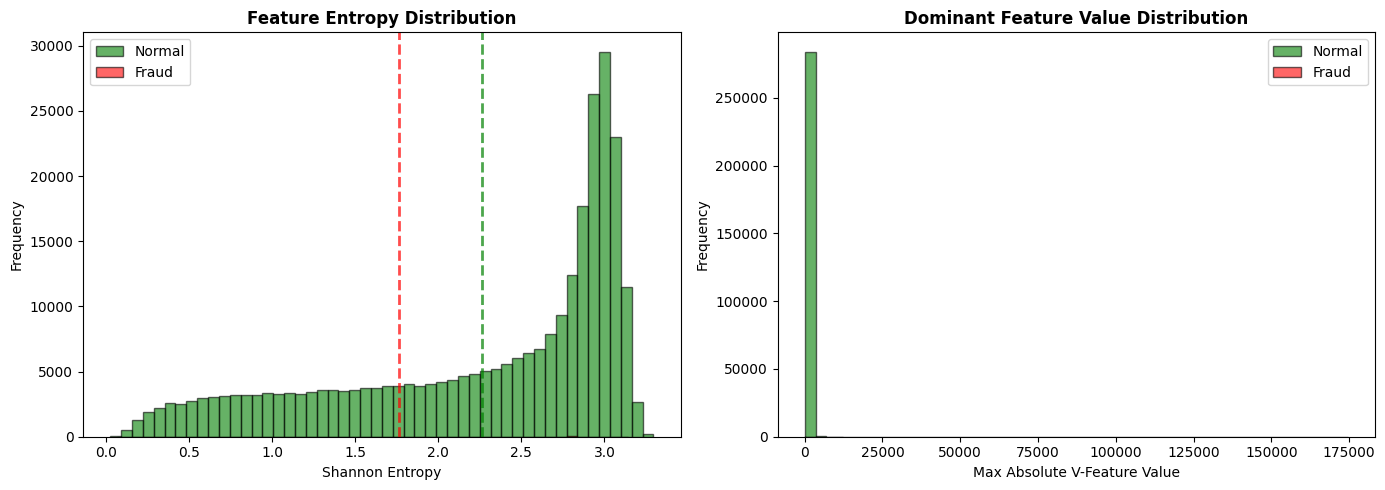

✅ Entropy features visualized!

🎓 TIER 3 COMPLETE!

🎉 ALL THREE TIERS COMPLETED!



In [37]:
# Visualize entropy features
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Feature entropy distribution
axes[0].hist(df[df['Class'] == 0]['feature_entropy'], bins=50, alpha=0.6, 
             label='Normal', color='green', edgecolor='black')
axes[0].hist(df[df['Class'] == 1]['feature_entropy'], bins=50, alpha=0.6, 
             label='Fraud', color='red', edgecolor='black')
axes[0].set_title('Feature Entropy Distribution', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Shannon Entropy')
axes[0].set_ylabel('Frequency')
axes[0].legend()
axes[0].axvline(normal_entropy, color='green', linestyle='--', linewidth=2, alpha=0.7)
axes[0].axvline(fraud_entropy, color='red', linestyle='--', linewidth=2, alpha=0.7)

# Dominant feature value
axes[1].hist(df[df['Class'] == 0]['dominant_feature_value'], bins=50, alpha=0.6, 
             label='Normal', color='green', edgecolor='black')
axes[1].hist(df[df['Class'] == 1]['dominant_feature_value'], bins=50, alpha=0.6, 
             label='Fraud', color='red', edgecolor='black')
axes[1].set_title('Dominant Feature Value Distribution', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Max Absolute V-Feature Value')
axes[1].set_ylabel('Frequency')
axes[1].legend()

plt.tight_layout()
plt.savefig('/Users/gloriarusenova/Documents/Fraud Detection/outputs/entropy_features.png', dpi=300, bbox_inches='tight')
plt.show()

print("✅ Entropy features visualized!")
print("\n" + "="*60)
print("🎓 TIER 3 COMPLETE!")
print("="*60)
print("\n🎉 ALL THREE TIERS COMPLETED!\n")


---
# 📊 Feature Validation & Quality Check


In [44]:
print("🔍 FEATURE VALIDATION\n")
print("="*60)

# List all engineered features
engineered_features = [
    'log_amount', 'amount_zscore', 'is_amount_outlier',
    'iso_forest_score', 'is_iso_outlier',
    'hour_of_day', 'hour_sin', 'hour_cos', 'is_night',
    'V17_V14_interaction', 'V17_V12_interaction', 'pca_magnitude',
    'amount_percentile', 'is_round', 'V14_amount_interaction', 'top_5_sum',
    'distance_to_fraud', 'distance_to_normal', 'relative_distance',
    'feature_entropy', 'dominant_feature_value'
]

print(f"✅ Total engineered features: {len(engineered_features)}\n")

# Check for missing values
print("1️⃣ Checking for missing values...")
missing_counts = df[engineered_features].isnull().sum()
if missing_counts.sum() == 0:
    print("   ✅ No missing values!")
else:
    print("   ⚠️ Missing values detected:")
    print(missing_counts[missing_counts > 0])

# Check for infinite values
print("\n2️⃣ Checking for infinite values...")
inf_counts = np.isinf(df[engineered_features].select_dtypes(include=[np.number])).sum()
if inf_counts.sum() == 0:
    print("   ✅ No infinite values!")
else:
    print("   ⚠️ Infinite values detected:")
    print(inf_counts[inf_counts > 0])

# Check data types
print("\n3️⃣ Data types:")
print(df[engineered_features].dtypes.value_counts())

print("\n✅ Validation complete!")


🔍 FEATURE VALIDATION

✅ Total engineered features: 21

1️⃣ Checking for missing values...
   ✅ No missing values!

2️⃣ Checking for infinite values...
   ✅ No infinite values!

3️⃣ Data types:
float64    17
int64       4
Name: count, dtype: int64

✅ Validation complete!


## 🔗 Feature Correlation Analysis


In [39]:
# Check correlations among engineered features
print("📊 Analyzing feature correlations...\n")

# Select numeric engineered features
numeric_features = df[engineered_features].select_dtypes(include=[np.number]).columns.tolist()

# Calculate correlation matrix
correlation_matrix = df[numeric_features].corr()

# Find highly correlated pairs (|r| > 0.8, excluding self-correlation)
high_corr_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > 0.8:
            high_corr_pairs.append((
                correlation_matrix.columns[i],
                correlation_matrix.columns[j],
                correlation_matrix.iloc[i, j]
            ))

if high_corr_pairs:
    print("⚠️ Highly correlated feature pairs (|r| > 0.8):")
    for feat1, feat2, corr in high_corr_pairs:
        print(f"   {feat1} <-> {feat2}: {corr:.3f}")
    print("\n💡 Note: High correlation might indicate redundancy")
else:
    print("✅ No highly correlated pairs (|r| > 0.8)")

# Correlation with target (Class)
print("\n🎯 Correlation with fraud label (Class):")
target_corr = df[numeric_features + ['Class']].corr()['Class'].drop('Class').sort_values(ascending=False)
print("\nTop 10 positive correlations:")
print(target_corr.head(10))
print("\nTop 10 negative correlations:")
print(target_corr.tail(10))


📊 Analyzing feature correlations...

⚠️ Highly correlated feature pairs (|r| > 0.8):
   log_amount <-> amount_percentile: 0.990
   log_amount <-> feature_entropy: -0.813
   V17_V14_interaction <-> V17_V12_interaction: 0.930
   V17_V14_interaction <-> pca_magnitude: 0.879
   V17_V12_interaction <-> pca_magnitude: 0.913
   amount_percentile <-> feature_entropy: -0.808
   distance_to_fraud <-> distance_to_normal: 0.962
   distance_to_fraud <-> dominant_feature_value: 0.963
   distance_to_normal <-> dominant_feature_value: 1.000

💡 Note: High correlation might indicate redundancy

🎯 Correlation with fraud label (Class):

Top 10 positive correlations:
pca_magnitude             0.543898
V17_V12_interaction       0.542797
V17_V14_interaction       0.542507
is_iso_outlier            0.280025
distance_to_normal        0.053575
dominant_feature_value    0.051725
is_night                  0.021863
distance_to_fraud         0.015346
hour_sin                  0.012808
is_amount_outlier         0.00

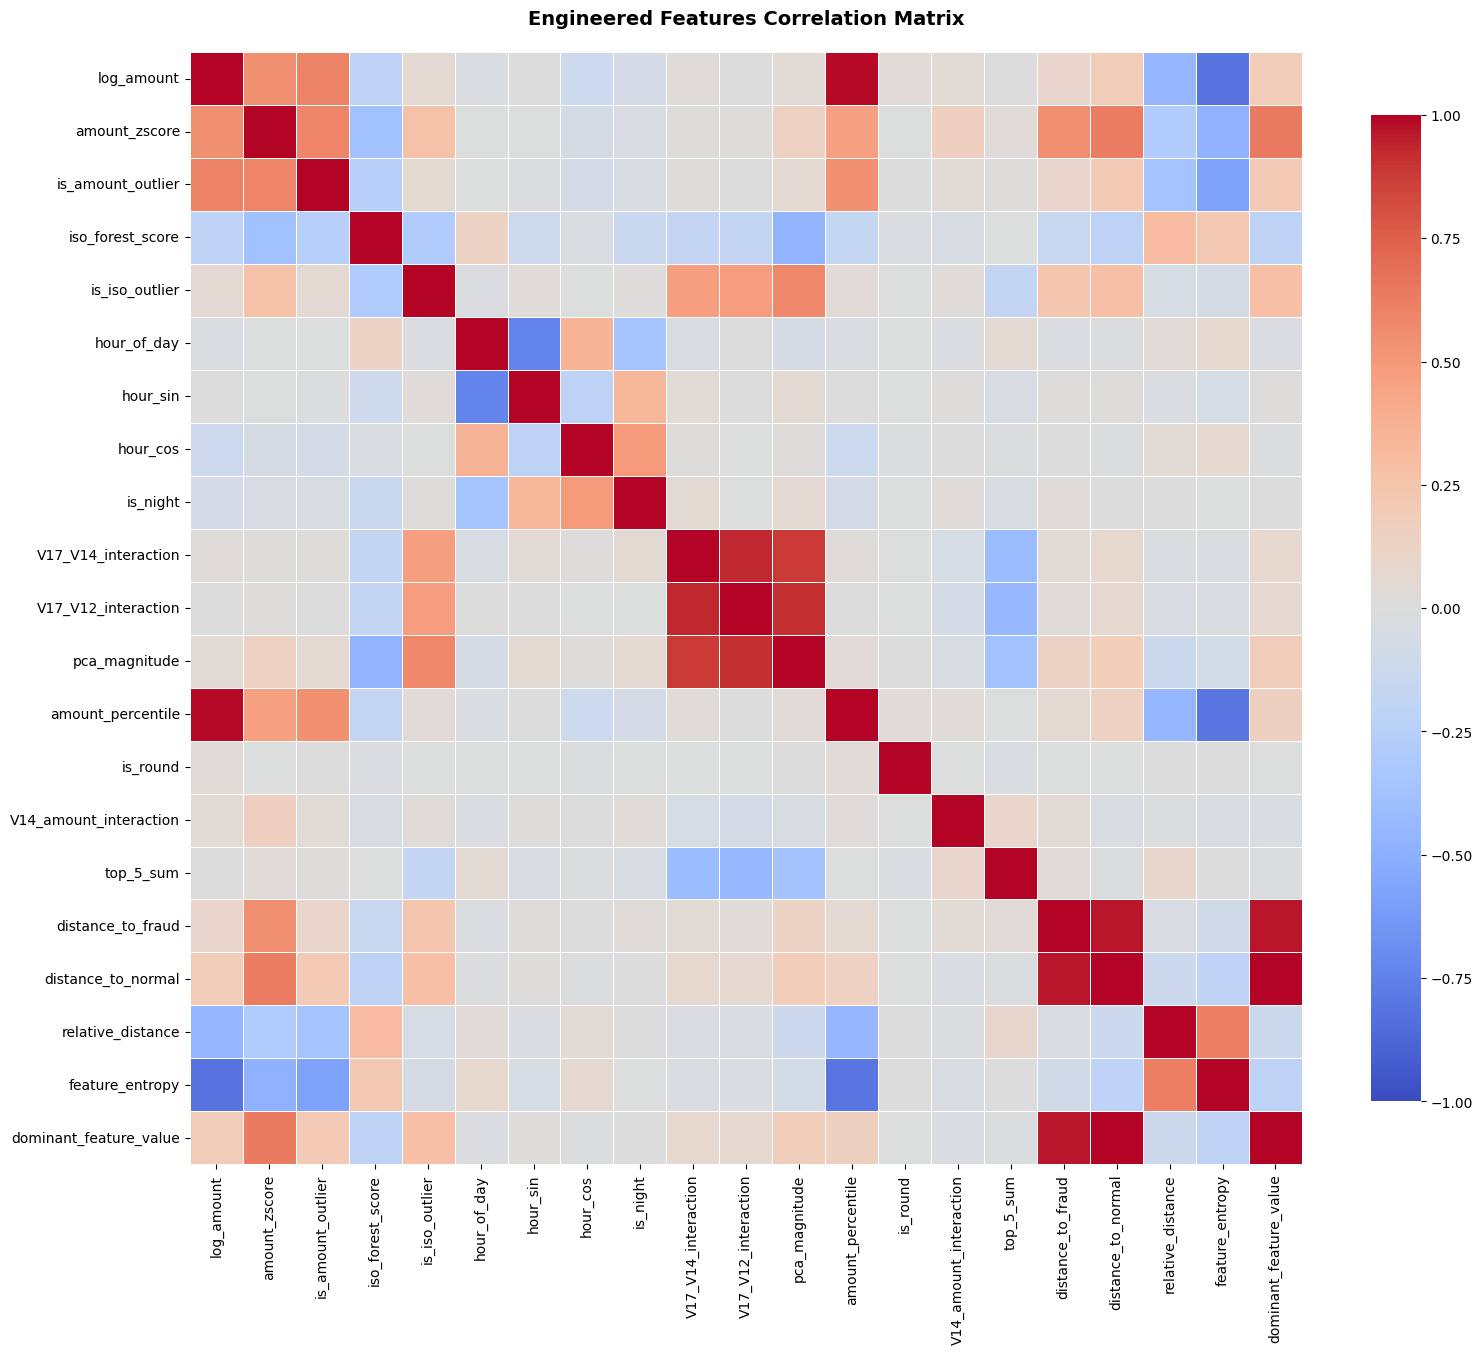

✅ Correlation heatmap saved!


In [40]:
# Visualize engineered features correlation heatmap
plt.figure(figsize=(16, 14))
sns.heatmap(correlation_matrix, cmap='coolwarm', center=0, 
            square=True, linewidths=0.5, cbar_kws={"shrink": 0.8},
            vmin=-1, vmax=1)
plt.title('Engineered Features Correlation Matrix', fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.savefig('/Users/gloriarusenova/Documents/Fraud Detection/outputs/engineered_features_correlation.png', dpi=300, bbox_inches='tight')
plt.show()

print("✅ Correlation heatmap saved!")


---
# 💾 Save Engineered Dataset


In [41]:
print("💾 Saving engineered dataset...\n")

# Save to CSV
csv_path = '/Users/gloriarusenova/Documents/Fraud Detection/data/creditcard_engineered.csv'
df.to_csv(csv_path, index=False)
print(f"✅ CSV saved: {csv_path}")
print(f"   Size: {len(df):,} rows × {len(df.columns)} columns")

# Save to SQLite database
import sqlite3
db_path = '/Users/gloriarusenova/Documents/Fraud Detection/data/fraud_detection.db'
conn = sqlite3.connect(db_path)
df.to_sql('transactions_engineered', conn, if_exists='replace', index=False)
conn.close()
print(f"✅ SQLite table created: transactions_engineered")
print(f"   Database: {db_path}")

print("\n📊 Dataset ready for Phase 4: Model Building!")


💾 Saving engineered dataset...

✅ CSV saved: /Users/gloriarusenova/Documents/Fraud Detection/data/creditcard_engineered.csv
   Size: 284,807 rows × 52 columns
✅ SQLite table created: transactions_engineered
   Database: /Users/gloriarusenova/Documents/Fraud Detection/data/fraud_detection.db

📊 Dataset ready for Phase 4: Model Building!


---
# 📝 Final Summary Report


In [42]:
print("\n" + "="*70)
print("🎉 PHASE 3: FEATURE ENGINEERING - COMPLETE!")
print("="*70)

print("\n📊 SUMMARY:")
print(f"   Original features: 31 (Time, V1-V28, Amount, Class)")
print(f"   Engineered features: {len(engineered_features)}")
print(f"   Total features: {len(df.columns)}")
print(f"   Total transactions: {len(df):,}")

print("\n✅ TIER 1 (Critical - 12 features):")
print("   • Amount transformations (log, z-score, outlier flag)")
print("   • Isolation Forest scores (continuous + binary)")
print("   • Time features (hour, cyclical encoding, night flag)")
print("   • PCA interactions (V17×V14, V17×V12, magnitude)")

print("\n✅ TIER 2 (Nice-to-Have - 4 features):")
print("   • Amount percentile & round number flag")
print("   • V14×Amount interaction")
print("   • Top 5 features sum")

print("\n✅ TIER 3 (Advanced - 5 features):")
print("   • Distance to fraud/normal centroids")
print("   • Relative distance ratio")
print("   • Feature entropy & dominant value")

print("\n🎯 KEY INSIGHTS:")
print(f"   • Outlier fraud lift: {fraud_lift:.1f}x")
print(f"   • Night fraud rate: {night_fraud_rate*100:.3f}%")
print(f"   • Day fraud rate: {day_fraud_rate*100:.3f}%")
print(f"   • Amount outliers: {df['is_amount_outlier'].mean()*100:.2f}%")

print("\n📁 OUTPUT FILES:")
print("   ✅ creditcard_engineered.csv")
print("   ✅ fraud_detection.db (transactions_engineered table)")
print("   ✅ 6 visualization PNG files in outputs/")

print("\n🚀 NEXT STEPS:")
print("   → Phase 4: Model Building")
print("   → Train multiple models (Logistic Regression, Random Forest, XGBoost)")
print("   → Handle class imbalance (SMOTE, class weights)")
print("   → Evaluate with precision, recall, F1, AUC-ROC")

print("\n" + "="*70)
print("✨ Feature engineering complete! Ready to build models! ✨")
print("="*70)



🎉 PHASE 3: FEATURE ENGINEERING - COMPLETE!

📊 SUMMARY:
   Original features: 31 (Time, V1-V28, Amount, Class)
   Engineered features: 21
   Total features: 52
   Total transactions: 284,807

✅ TIER 1 (Critical - 12 features):
   • Amount transformations (log, z-score, outlier flag)
   • Isolation Forest scores (continuous + binary)
   • Time features (hour, cyclical encoding, night flag)
   • PCA interactions (V17×V14, V17×V12, magnitude)

✅ TIER 2 (Nice-to-Have - 4 features):
   • Amount percentile & round number flag
   • V14×Amount interaction
   • Top 5 features sum

✅ TIER 3 (Advanced - 5 features):
   • Distance to fraud/normal centroids
   • Relative distance ratio
   • Feature entropy & dominant value

🎯 KEY INSIGHTS:
   • Outlier fraud lift: 216.6x
   • Night fraud rate: 0.416%
   • Day fraud rate: 0.139%
   • Amount outliers: 11.20%

📁 OUTPUT FILES:
   ✅ creditcard_engineered.csv
   ✅ fraud_detection.db (transactions_engineered table)
   ✅ 6 visualization PNG files in output